In [1]:
import numpy as np
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
from scipy.stats import pearsonr

In [2]:
# Loading in restaurant data
fastfood = pd.read_csv("C:/Users/Noah/Coding/food_study/data/clean_data/fast_food_data_cleaned.csv",
       dtype={'address': 'str', 'city': 'str', 'country': 'str', 'keys': 'str', 'latitude': 'float64',
       'longitude': 'float64', 'name': 'str', 'postalcode': 'str', 'state': 'str',
       'state_full': 'str', 'id': 'int64'})
fastfood.columns = ['address', 'city', 'country', 'keys', 'latitude', 'longitude', 'name',
       'postalcode', 'state', 'state_full', 'id']

In [3]:
# loading in vegetarian/vegan-compatible restaurant data
veggiefood = pd.read_excel("C:/Users/Noah/Coding/food_study/data/clean_data/veggie_restaurants_per_state.xlsx",
    usecols="A, B")

In [4]:
# Loading in state data
statepop = pd.read_excel("C:/Users/Noah/Coding/food_study/data/clean_data/state_populations_2018.xlsx", engine='openpyxl')
statepop.columns = ['name', 'population']
# create a Series of each state and its population
populations = statepop['population']
populations.index = statepop['name']

# Fast Food Data Analysis

In [5]:
fastfood

,address,city,country,keys,latitude,longitude,name,postalcode,state,state_full,id
0,0-31 44th St,Grandville,US,us/mi/grandville/0-3144thst/-2061630068,42.884700,-85.759400,BURGER KING,49418,MI,Michigan,1
1,"0 Randolph AFB,",Randolph A F B,US,"us/tx/randolphafb/0randolphafb,/-2061630068",29.530400,-98.279000,BURGER KING,78150,TX,Texas,2
2,1 Beroth St,Yadkinville,US,us/nc/yadkinville/1berothst/-1161002137,36.120700,-80.661600,MCDONALDS,27055,NC,North Carolina,3
3,1 Borgata Way,Atlantic City,US,us/nj/atlanticcity/1borgataway/-1191797674,39.377390,-74.435680,PANDA EXPRESS,8401,NJ,New Jersey,4
4,1 Center Plz,Boston,US,us/ma/boston/1centerplz/-2061630068,42.360650,-71.060820,BURGER KING,2108,MA,Massachusetts,5
...,...,...,...,...,...,...,...,...,...,...,...
9370,Us Hwy 522 S,Lewistown,US,us/pa/lewistown/ushwy522s/-1161002137,39.161100,-78.155500,MCDONALDS,17044,PA,Pennsylvania,9371
9371,"Via Gorgolungo, 6",Highland Park,US,"us/il/highlandpark/viagorgolungo,6/-1161002137",43.522720,13.251990,MCDONALDS,60035,IL,Illinois,9372
9372,W 249 N 6498 Hwy 164,Sussex,US,us/wi/sussex/w249n6498hwy164/-864103396,43.137894,-88.243710,TACO BELL,53089,WI,Wisconsin,9373
9373,W Hwy 50 O'fallon Il,Fairview Heights,US,us/il/fairviewheights/whwy50o'fallonil/-116100...,38.593009,-89.955407,MCDONALDS,62208,IL,Illinois,9374


In [6]:
state_ff_count = fastfood.groupby(['state_full']).count()['id'] # creates a Series of the number of fast food restaurants per state
state_ff_count.sort_values(0, False)

C:\Users\Noah\AppData\Local\Temp\ipykernel_14176\3263976867.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  state_ff_count.sort_values(0, False)


state_full
California              625
Texas                   595
Ohio                    504
Florida                 447
Indiana                 369
North Carolina          339
Georgia                 337
Illinois                332
Virginia                319
Missouri                315
Kentucky                314
Pennsylvania            266
New York                257
Michigan                246
Louisiana               235
Alabama                 232
Tennessee               228
South Carolina          226
Washington              193
Arizona                 193
Oklahoma                191
Wisconsin               174
Iowa                    157
Colorado                147
Arkansas                146
Utah                    145
Minnesota               143
Maryland                141
New Mexico              131
New Jersey              130
Massachusetts           115
Nevada                  115
South Dakota            104
Oregon                  101
Kansas                   98
Idaho    

The states with the highest number of fast food restaurants are California, Texas, and Pennsylvania. California and Texas make sense, given that they have such high populations. Let's divide by state population for a per-capita figure.

In [7]:
# sort the fast food count by state so the index of this series lines up with the state population indices
state_ff_count_sorted = state_ff_count.sort_index()

#### Number of fast food restaurants per 1,000 people

In [8]:
ff_per_capita = state_ff_count_sorted.divide(populations)
ff_per_capita = ff_per_capita.sort_values(0, False) * 1000

C:\Users\Noah\AppData\Local\Temp\ipykernel_14176\3309864197.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  ff_per_capita = ff_per_capita.sort_values(0, False) * 1000


<AxesSubplot:ylabel='state_full'>

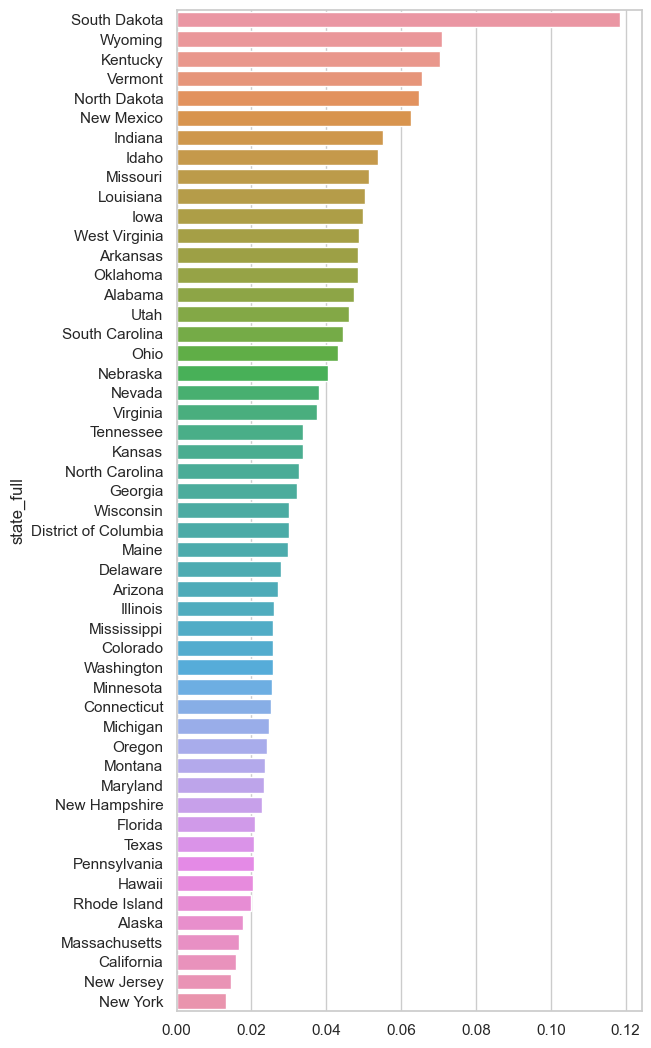

In [9]:
fig, ax = plt.subplots(figsize=(6, 13))
sns.barplot(x=ff_per_capita.values, y=ff_per_capita.index, orient='h', ax=ax)


insert conclusions here

# Veg Restaurant Data Analysis

In [32]:
veggiefood.sort_values(['num_of_restaurants'], ascending=False).head()

,state,num_of_restaurants
50,California,8137
49,New York,3904
48,Florida,3764
47,Texas,2965
46,Pennsylvania,1776


Once again, many of the highest-ranking states, such as New York, California, Florida, and Texas, are those with the highest populations. Per-capita calculations follow.

#### Number of vegetarian restaurants per 1,000 people

In [11]:
# convert data to series to perform arithmetic with populations data
veggie_sorted = veggiefood.sort_values(['state'])
veggie_sorted = pd.Series(data=list(veggie_sorted['num_of_restaurants']), index=veggie_sorted['state'])

veg_per_capita = veggie_sorted.divide(populations) * 1000
veg_per_capita = veg_per_capita.sort_index(0, False)
veg_per_capita = veg_per_capita.sort_values(0, False)

C:\Users\Noah\AppData\Local\Temp\ipykernel_14176\2841468960.py:6: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only.
  veg_per_capita = veg_per_capita.sort_index(0, False)
C:\Users\Noah\AppData\Local\Temp\ipykernel_14176\2841468960.py:7: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  veg_per_capita = veg_per_capita.sort_values(0, False)


<AxesSubplot:ylabel='state'>

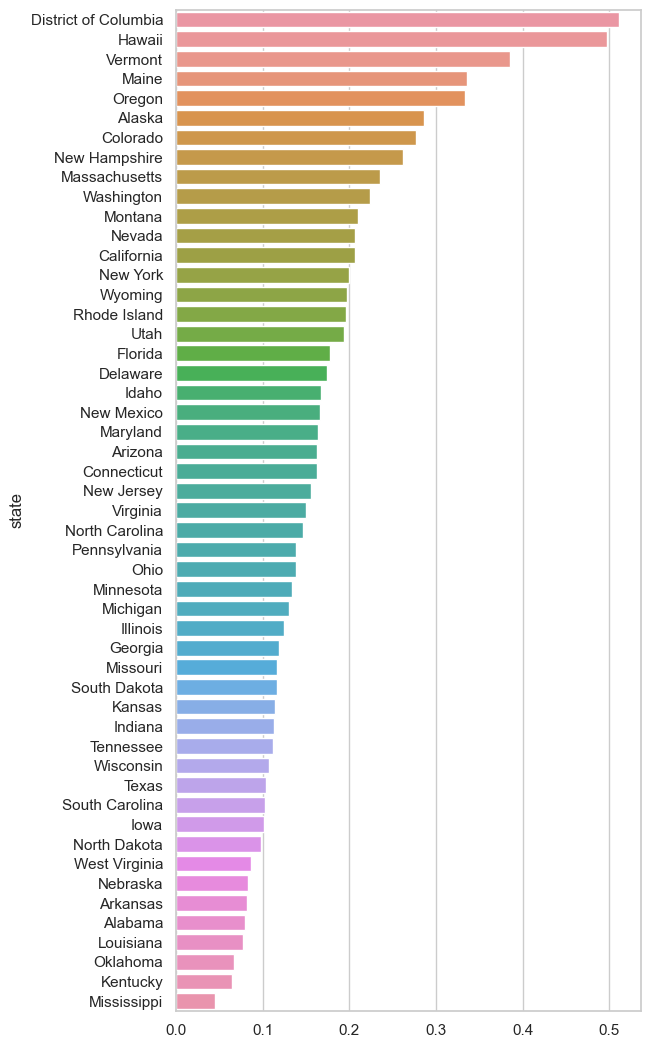

In [12]:
fig, ax = plt.subplots(figsize=(6, 13))
sns.barplot(x=veg_per_capita.values, y=veg_per_capita.index, orient='h', ax=ax)


Disregarding Washington DC, the state with the highest per-capita amount of vegetarian-friendly restaurants is Hawaii, with one such business per 2,000 people. Mississippi, in last place, has a darth of vegetarian options with only one to every 22,200 people. However, it's important to note that HappyCow's data is user-provided; states such as OK, KY, and MS simply may not have many people who know about their website, and thus few submissions.

insert map here :3

## Exploring the relationship between the number of vegetarian restaurants and demographic variables

It's now clear that eating out as a vegetarian or vegan is not as easy in the American midwest than as it is on either coast. However, it's worth exploring just what characteristics of different states, such as wealth and political beliefs, may be contributing to this contrast.

### Variable 1: Political Demographics

In [13]:
# load in the data containing political party identification figures per state
party = pd.read_excel("C:/Users/Noah/Coding/food_study/data/clean_data/state_party_and_identification_2018.xlsx", engine='openpyxl')
party.head()

,State,Democrat,Republican,Classification
0,Alabama,35,52,Strong Republican
1,Alaska,33,51,Strong Republican
2,Arizona,41,41,Competitive
3,Arkansas,35,48,Strong Republican
4,California,51,31,Strong Democratic
5,Colorado,47,40,Lean Democratic
6,Connecticut,52,33,Strong Democratic
7,Delaware,48,35,Strong Democratic
8,Florida,42,41,Competitive
9,Georgia,43,42,Competitive


In [14]:
# calculate the percentage of democratic identification per state
partyTotal = pd.Series(party['Democrat'] + party['Republican'])
partyTotal.index = party['State']
dem = party['Democrat']
dem.index = party['State']

In [15]:
demPerc = dem.divide(partyTotal)
demPerc

State
Alabama           0.402299
Alaska            0.392857
Arizona           0.500000
Arkansas          0.421687
California        0.621951
Colorado          0.540230
Connecticut       0.611765
Delaware          0.578313
Florida           0.506024
Georgia           0.505882
Hawaii            0.650602
Idaho             0.404762
Illinois          0.595238
Indiana           0.452381
Iowa              0.500000
Kansas            0.433735
Kentucky          0.482759
Louisiana         0.451220
Maine             0.574713
Maryland          0.635294
Massachusetts     0.674699
Michigan          0.535714
Minnesota         0.547619
Mississippi       0.428571
Missouri          0.447059
Montana           0.458824
Nebraska          0.494118
Nevada            0.542169
New Hampshire     0.571429
New Jersey        0.588235
New Mexico        0.558140
New York          0.638554
North Carolina    0.493976
North Dakota      0.352941
Ohio              0.476744
Oklahoma          0.452381
Oregon            0.55

In [16]:
# removing DC from vegetarian data, since it's not in political data
veg2 = veg_per_capita.drop(labels='District of Columbia',
        axis=0, inplace=False)
veg2 = veg2.sort_index(0,False)

# merging the data to later plot it
partyFull = pd.DataFrame({'restaurants_per_capita': veg2.values, 'percent_democrat': demPerc.values},
        index=veg2.index)
partyFull.head()

C:\Users\Noah\AppData\Local\Temp\ipykernel_14176\2560722061.py:4: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only.
  veg2 = veg2.sort_index(0,False)


,restaurants_per_capita,percent_democrat
state,,
Alabama,0.079383,0.402299
Alaska,0.285660,0.392857
Arizona,0.162475,0.500000
Arkansas,0.081735,0.421687
California,0.206201,0.621951
Colorado,0.277266,0.540230
Connecticut,0.162396,0.611765
Delaware,0.174007,0.578313
Florida,0.177177,0.506024


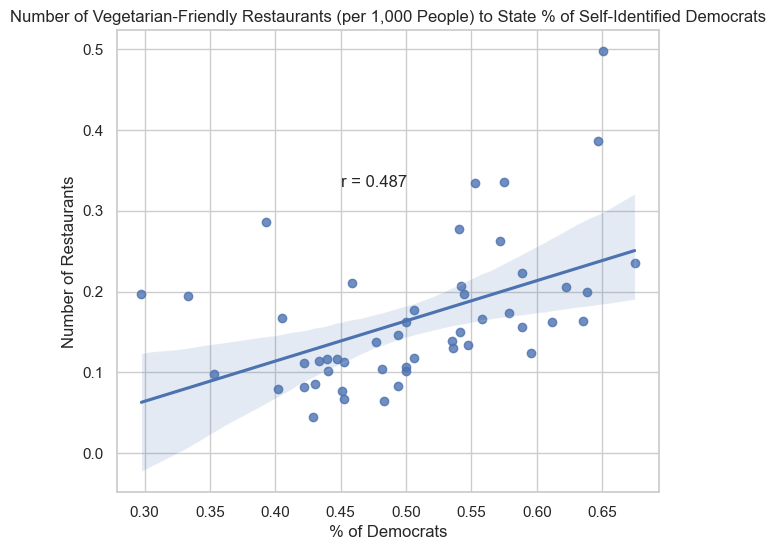

In [114]:
# create scatterplot with the two variables of interest
fig, ax = plt.subplots(figsize=(7, 6))
sns.regplot(partyFull, 
    x='percent_democrat', 
    y='restaurants_per_capita').set(
        xlabel='% of Democrats', 
        ylabel='Number of Restaurants', 
        title='Number of Vegetarian-Friendly Restaurants (per 1,000 People) to State % of Self-Identified Democrats')

# calculate pearson correlation coefficient
r, p = pearsonr(x=partyFull['percent_democrat'], y=partyFull['restaurants_per_capita'])
# include values as annotations
ax.text(.45, 0.33, 'r = {:.3f}'.format(r))

plt.show()

The relationship between political party and the number of vegetarian-friendly restaurants has a moderate *r* of 0.487.

### Variable 2: Race

In [18]:
race = pd.read_csv("C:/Users/Noah/Coding/food_study/data/clean_data/race_by_state_2018.csv")
race.rename(columns={'Location': 'state'})
race.head()

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Non-white
0,Alabama,0.656,0.265,0.043,0.013,<.01,NaN,0.019,0.340
1,Alaska,0.601,0.029,0.071,0.061,0.156,0.011,0.072,0.400
2,Arizona,0.545,0.042,0.316,0.032,0.039,<.01,0.024,0.453
3,Arkansas,0.722,0.15,0.077,0.015,0.01,<.01,0.027,0.279
4,California,0.367,0.054,0.394,0.146,<.01,<.01,0.033,0.627


In [19]:
# combine restaurant and race data
raceFull = pd.DataFrame({'restaurants_per_capita': veg2.values, 'percent_white': race.White})
raceFull.index = veg2.index
raceFull.head()

,restaurants_per_capita,percent_white
state,,
Alabama,0.079383,0.656
Alaska,0.285660,0.601
Arizona,0.162475,0.545
Arkansas,0.081735,0.722
California,0.206201,0.367


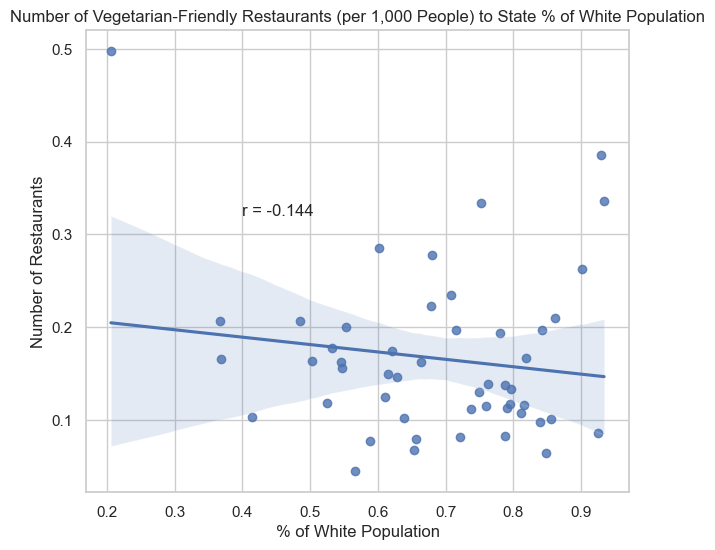

In [113]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.regplot(raceFull, 
    x='percent_white', 
    y='restaurants_per_capita').set(
        xlabel='% of White Population', 
        ylabel='Number of Restaurants', 
        title='Number of Vegetarian-Friendly Restaurants (per 1,000 People) to State % of White Population')

# calculate pearson correlation coefficient
r, p = pearsonr(x=raceFull['percent_white'], y=raceFull['restaurants_per_capita'])
# include values as annotations
ax.text(0.4, 0.32, 'r = {:.3f}'.format(r))

plt.show()

There is a negative, albeit nearly non-existent, relationship between a state's white population percentage and its number of vegetarian-friendly restaurants. Much of the *r* of -0.14 is due to Hawaii, which is mostly composed of people of color and is the leading state in terms of accomodating vegetarians and vegans. Compared to traditional American food, vegetarian dishes are much easier to find in the cuisine of various Asian cultures; with such a high Asian population (38%), this may be what's at play in Hawaii. Aside from that, race seems to be insignificant.

## Variable 3: Income

In [21]:
# load data for each state's average yearly income
income = pd.read_excel("C:/Users/Noah/Coding/food_study/data/clean_data/state_income_2018.xlsx", engine='openpyxl')
income.columns = ['state', 'income']
income.head()

,state,income
0,Alabama,49936
1,Alaska,68734
2,Arizona,62283
3,Arkansas,49781
4,California,70489


In [22]:
# combine data
veg_per_capita = veg_per_capita.sort_index(0, False)
    # use the data that has D.C. in it, since the income data does too
incomeFull = pd.DataFrame({'num_of_restaurants': veg_per_capita.values, 'income': income.income})
incomeFull.index = veg_per_capita.index
incomeFull.head()

C:\Users\Noah\AppData\Local\Temp\ipykernel_14176\660051829.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only.
  veg_per_capita = veg_per_capita.sort_index(0, False)


,num_of_restaurants,income
state,,
Alabama,0.079383,49936
Alaska,0.285660,68734
Arizona,0.162475,62283
Arkansas,0.081735,49781
California,0.206201,70489


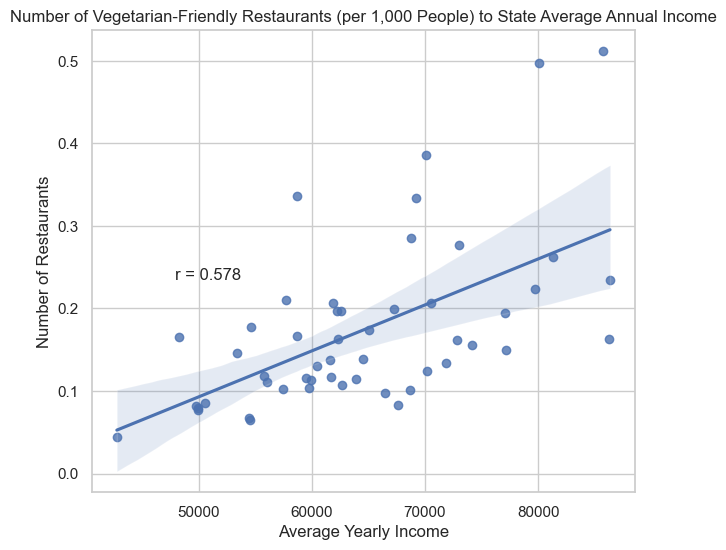

In [108]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.regplot(incomeFull, 
    x='income', 
    y='num_of_restaurants').set(
        xlabel='Average Yearly Income', 
        ylabel='Number of Restaurants', 
        title='Number of Vegetarian-Friendly Restaurants (per 1,000 People) to State Average Annual Income')

# calculate pearson correlation coefficient
r, p = pearsonr(x=incomeFull['income'], y=incomeFull['num_of_restaurants'])
# include value as annotations
ax.annotate('r = {:.3f}'.format(r), xy=(0.25, 0.45), xycoords='figure fraction')

plt.show()

Here we see the strongest relationship of all: an *r* of 0.578, meaning there is a moderate relationship between the average yearly income and number of vegetarian-friendly restaurants of a given state.  
There are many sub-variables resulting from having a higher income that must be contributing to this. For example, a guess as to why fewer people with a lower income are likely to become vegetarians in the first place would be that working class people have less time to cook their own food; a single, working mother may find it much more difficult than I did to take the time to learn new, vegetarian recipes for her picky children.Additionally, those with less income may have less access to pricier grocery stores that provide more vegetarian ingredients and alternatives, such as Sprouts and Whole Foods. If an area has fewer vegetarians, it would make sense that the lower demand would result in fewer vegetarian restaurants popping up.